**Ejercicio 8**

El fichero titanic.csv contiene información sobre los pasajeros del Titanic. Crear un dataframe con Pandas y a partir de él generar los siguientes diagramas.

1. Diagrama de sectores con los fallecidos y supervivientes.
2. Histograma con las edades.
3. Diagrama de barras con el número de personas en cada clase.
4. Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.
5. Diagrama de barras con el número de personas fallecidas y supervivientes acumuladas en cada clase.

**Solución**

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('archivos_externos\\titanic.csv', sep=',', header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


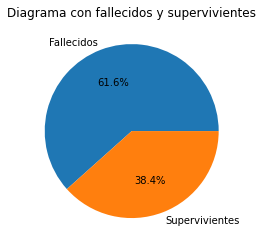

In [174]:
#Diagrama de sectores con los fallecidos y supervivientes.
fig, axes = plt.subplots()
axes.pie(df['Survived'].value_counts(), labels=['Fallecidos', 'Supervivientes'], autopct='%.1f%%', textprops={'color':'Black'})
plt.title('Diagrama con fallecidos y supervivientes', color='Black')
plt.show()

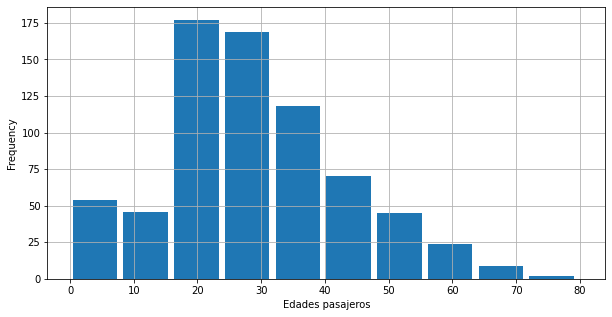

In [175]:
#Histograma con las edades.
fig, axes = plt.subplots(figsize =(10, 5))
df['Age'].plot(kind='hist', width=7, ax=axes)
axes.grid()
axes.set_xlabel('Edades pasajeros')
plt.show()


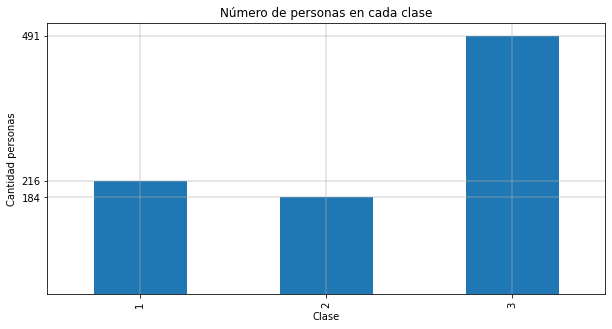

In [126]:
#Diagrama de barras con el número de personas en cada clase.
fig, axes = plt.subplots(figsize=(10,5))
df['Pclass'].value_counts().sort_index().plot(kind='bar', ax=axes)
axes.set_yticks(df['Pclass'].value_counts().sort_index().values)
axes.grid(alpha=0.3, linewidth=2)
axes.set_xlabel('Clase')
axes.set_ylabel('Cantidad personas')
axes.set_title('Número de personas en cada clase')
plt.show()

In [145]:
#Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.
contar = df.groupby(['Pclass','Survived'])
contar.count()['PassengerId']

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

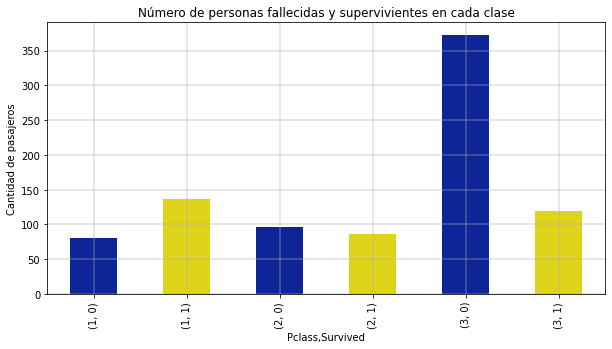

In [163]:
fig, axes = plt.subplots(figsize=(10,5))
colores = ['#0E2597', '#DFD41A', '#0E2597', '#DFD41A', '#0E2597', '#DFD41A']
contar.count()['PassengerId'].plot(kind='bar', ax=axes, color=colores)
axes.grid(linewidth=2, alpha=0.3)
axes.set_ylabel('Cantidad de pasajeros')
axes.set_title('Número de personas fallecidas y supervivientes en cada clase')
plt.show()

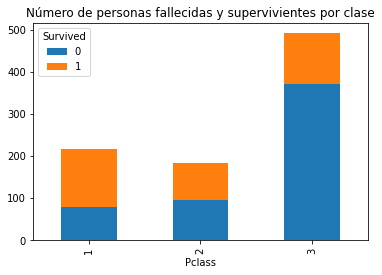

In [172]:
#Diagrama de barras con el número de personas fallecidas y supervivientes acumuladas en cada clase.
contar = df.groupby(["Pclass", "Survived"]).size().unstack().plot(kind = "bar", stacked = True, title = "Número de personas fallecidas y supervivientes por clase")
plt.show()